In [1]:
%matplotlib widget

In [2]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

# Add the absolute path to the *src* folder
project_root = os.path.abspath("..")  # go up from /notebooks to project root
src_path = os.path.join(project_root, "src")
sys.path.append(src_path)

# Now import without 'src.' prefix
from optimizer import optimize_momentum
from test_functions import sphere
from test_functions import rastrigin
from mpl_toolkits.mplot3d import Axes3D  # needed to register 3D plots


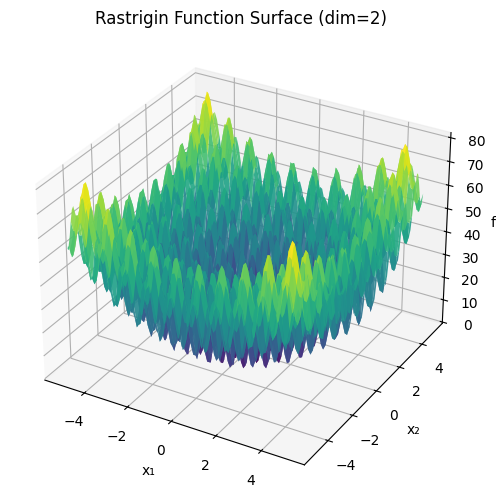

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from test_functions import rastrigin  # or wherever your function is

# Get the 2D rastrigin function (dim=2)
func, grad = rastrigin(dim=2)

# Generate grid
x1 = np.linspace(-5.12, 5.12, 100)
x2 = np.linspace(-5.12, 5.12, 100)
X1, X2 = np.meshgrid(x1, x2)

# Flatten and stack to feed into func
X_flat = np.column_stack((X1.ravel(), X2.ravel()))

# Evaluate Rastrigin on the grid
Z_flat = np.array([func(x) for x in X_flat])
Z = Z_flat.reshape(X1.shape)

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.9, edgecolor='none')
ax.set_title("Rastrigin Function Surface (dim=2)")
ax.set_xlabel("x₁")
ax.set_ylabel("x₂")
ax.set_zlabel("f(x)")
plt.show()

In [10]:
best_val = float('inf')
best_x_overall = None

# Get the 2D rastrigin function (dim=2)
func, grad = rastrigin(dim=2)

for i in range(10):
    x, _ = optimize_momentum(func, grad, dim=3, alpha=0.005, beta=0.9)
    val = func(x)
    if val < best_val:
        best_val = val
        best_x_overall = x

print("Best overall:", best_x_overall)
print("Value:", best_val)

Best overall: [-2.98485570e+000  6.22153205e-117 -9.94958638e-001]
Value: -0.050439701419698224
